In [45]:
import osmnx as ox
import networkx as nx
from matplotlib import pyplot as plt
import pandas as pd
import time
%matplotlib inline

In [2]:
place_name = "Kamppi, Helsinki, Finland"

In [3]:
graph = ox.graph_from_place(place_name, network_type='drive' )

C:\Users\C72178\AppData\Local\Continuum\anaconda3\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [38]:
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)
nodes = ox.graph_to_gdfs(graph, nodes=True, edges=False)
edges

,bridge,geometry,highway,junction,key,lanes,length,maxspeed,name,oneway,osmid,u,v
0,NaN,"LINESTRING (24.9209884 60.1647959, 24.9209472 ...",primary,NaN,0,2,40.495,40,Mechelininkatu,True,"[23856784, 31503767]",25216594,1372425714
1,NaN,"LINESTRING (24.9210331 60.1636625, 24.9210408 ...",primary,NaN,0,2,16.612,40,Mechelininkatu,True,"[29977177, 30470347]",25238874,1372425713
2,NaN,"LINESTRING (24.921303 60.1646301, 24.9212736 6...",primary,NaN,0,2,25.353,40,NaN,True,"[372440330, 8135861]",25238944,25216594
3,NaN,"LINESTRING (24.921303 60.1646301, 24.9213581 6...",primary,NaN,0,2,240.703,40,Mechelininkatu,True,"[25514547, 30288797, 30288799]",25238944,319896278
4,NaN,"LINESTRING (24.9370245 60.1643249, 24.9369344 ...",tertiary,NaN,0,NaN,139.174,"[30, 40]",Fredrikinkatu,True,"[30568275, 36729015, 316590744, 316590745, 316...",25291537,25291591
5,NaN,"LINESTRING (24.9370245 60.1643249, 24.9371912 ...",tertiary,NaN,0,NaN,156.780,30,Bulevardi,False,"[42919371, 42919372, 42919373, 42919374, 42919...",25291537,25291565
6,NaN,"LINESTRING (24.9370245 60.1643249, 24.9368722 ...",tertiary,NaN,0,2,170.504,30,Bulevardi,False,"[333061568, 333061571, 333061573, 572656872, 8...",25291537,25292473
7,NaN,"LINESTRING (24.9416784 60.1659489, 24.9415665 ...",tertiary,NaN,0,"[3, 2]",157.690,30,Bulevardi,False,"[76334538, 217644146, 76334539, 42919373]",25291564,25291565
8,NaN,"LINESTRING (24.9416784 60.1659489, 24.9415855 ...",residential,NaN,0,2,138.180,30,Yrjönkatu,False,"[62212960, 76333545, 76333547, 36726223, 36726...",25291564,1377211669
9,NaN,"LINESTRING (24.9393442 60.1651349, 24.939259 6...",residential,NaN,0,NaN,139.055,"[30, 40]",Annankatu,False,"[21081120, 332402667, 316713564, 36729011]",25291565,1377211666


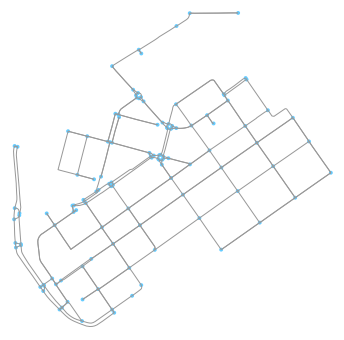

In [11]:
fig, ax = ox.plot_graph(graph)

In [12]:
 edges.columns

Index(['bridge', 'geometry', 'highway', 'junction', 'key', 'lanes', 'length',
       'maxspeed', 'name', 'oneway', 'osmid', 'u', 'v'],
      dtype='object')

In [13]:
edges['highway'].value_counts()

residential      110
tertiary          76
primary           25
secondary         18
unclassified      11
living_street      4
primary_link       1
Name: highway, dtype: int64

In [14]:
graph_proj = ox.project_graph(graph)

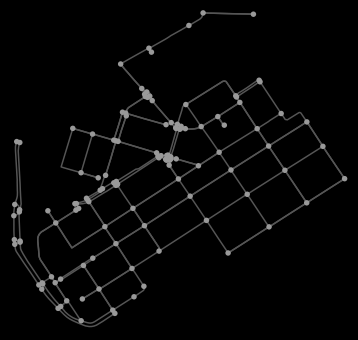

In [15]:
fig, ax = ox.plot_graph(graph_proj, bgcolor='k', node_size=30, node_color='#999999', node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
plt.tight_layout()

In [16]:
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)

In [17]:
 print("Coordinate system:", edges_proj.crs)

Coordinate system: {'datum': 'WGS84', 'ellps': 'WGS84', 'proj': 'utm', 'zone': 35, 'units': 'm'}


In [18]:
edges_proj.head()

,bridge,geometry,highway,junction,key,lanes,length,maxspeed,name,oneway,osmid,u,v
0,NaN,LINESTRING (384627.545538336 6671580.412443067...,primary,NaN,0,2,40.548,40,Mechelininkatu,True,"[23856784, 31503767]",25216594,1372425714
1,NaN,"LINESTRING (384626.0520782604 6671454.1489614,...",primary,NaN,0,2,16.621,40,Mechelininkatu,True,"[29977177, 30470347]",25238874,1372425713
2,NaN,LINESTRING (384644.4188590329 6671561.40374299...,primary,NaN,0,2,29.174,40,NaN,True,"[372440330, 8135861]",25238944,25216594
3,NaN,LINESTRING (384644.4188590329 6671561.40374299...,primary,NaN,0,2,242.270,40,Mechelininkatu,True,"[25514547, 30288797, 30288799]",25238944,319896278
4,NaN,LINESTRING (385515.6177361084 6671500.06512665...,tertiary,NaN,0,NaN,139.183,"[30, 40]",Fredrikinkatu,True,"[30568275, 36729015, 316590744, 316590745, 316...",25291537,25291591


In [19]:
stats = ox.basic_stats(graph_proj)

In [20]:
area = edges_proj.unary_union.convex_hull.area

In [21]:
stats = ox.basic_stats(graph_proj, area=area)

In [22]:
extended_stats = ox.extended_stats(graph_proj, ecc=True, bc=True, cc=True)

In [23]:
for key, value in extended_stats.items():
    stats[key] = value

In [24]:
pd.Series(stats)

avg_neighbor_degree                    {25216594: 2.0, 25238874: 2.0, 25238944: 1.0, ...
avg_neighbor_degree_avg                                                          2.11179
avg_weighted_neighbor_degree           {25216594: 0.049324257669922066, 25238874: 0.1...
avg_weighted_neighbor_degree_avg                                               0.0795817
betweenness_centrality                 {25216594: 0.03962877658853814, 25238874: 0.06...
betweenness_centrality_avg                                                     0.0684608
center                                                                      [1372376937]
circuity_avg                                                                 1.27752e-05
clean_intersection_count                                                            None
clean_intersection_density_km                                                       None
closeness_centrality                   {25216594: 0.0008561890545156209, 25238874: 0....
closeness_centrality_

In [43]:
location_point = (24.921, 60.16)
nearest_node, distance = ox.get_nearest_node(graph, location_point, method='haversine', return_dist=True)

In [44]:
ox.add_edge_lengths(graph)
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)
nodes = ox.graph_to_gdfs(graph, nodes=True, edges=False)